# Iris Dataset

Problem statement: For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

## Required Libraries

In [26]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn import tree
import sklearn.datasets as datasets

## Reading the Dataset

In [17]:
# Importing the dataset
dataset = pd.read_csv('F:\Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
# deleting the iD columns
del dataset['Id']

In [20]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [24]:
#No. of rows and columns 
dataset.shape

(150, 5)

In [25]:
dataset.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

## Data Visualization

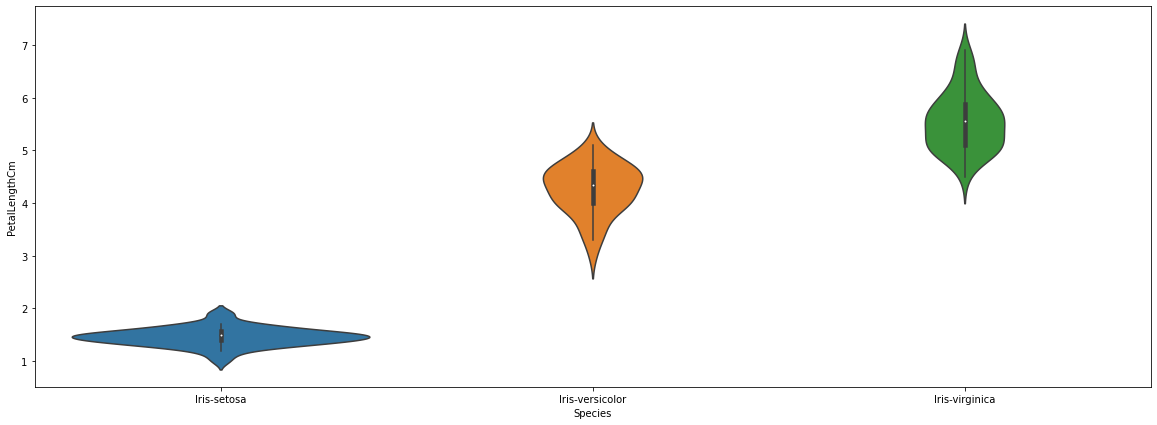

In [27]:
plt.figure(figsize=(20,7))
sns.violinplot(dataset.Species,dataset.PetalLengthCm)

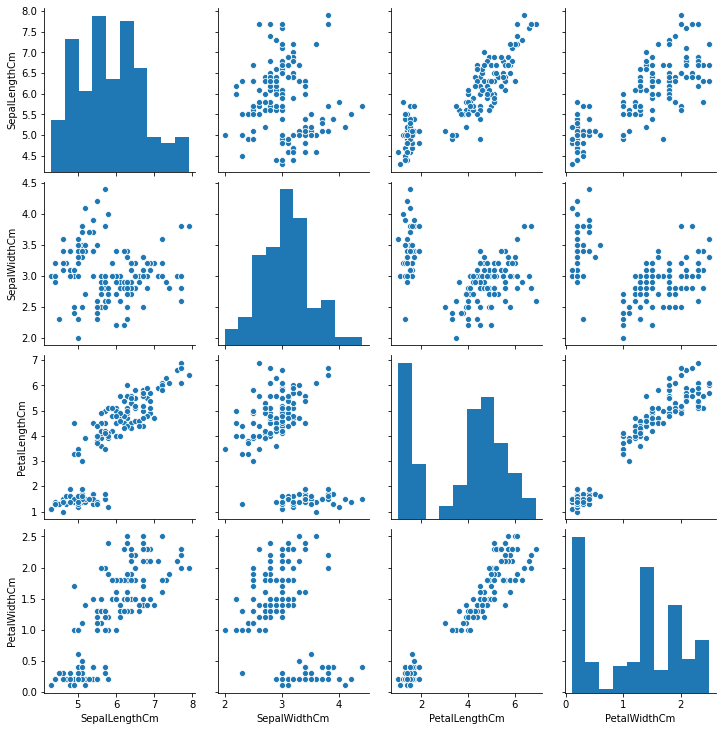

In [29]:
# Pairplot of the given data
sns.pairplot(dataset)

## Training the Dataset

In [45]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)


## Building the model

In [46]:
# Fitting Decision Tree Classification to the Training set
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 7)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=7)

In [47]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [48]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  0],
       [ 0,  4,  1],
       [ 0,  0,  9]], dtype=int64)

## ACCURACY

In [49]:
acc=accuracy_score(y_test,y_pred)
print(" The model accuracy score :",acc*100)

 The model accuracy score : 96.66666666666667


## Visualization Of Tree

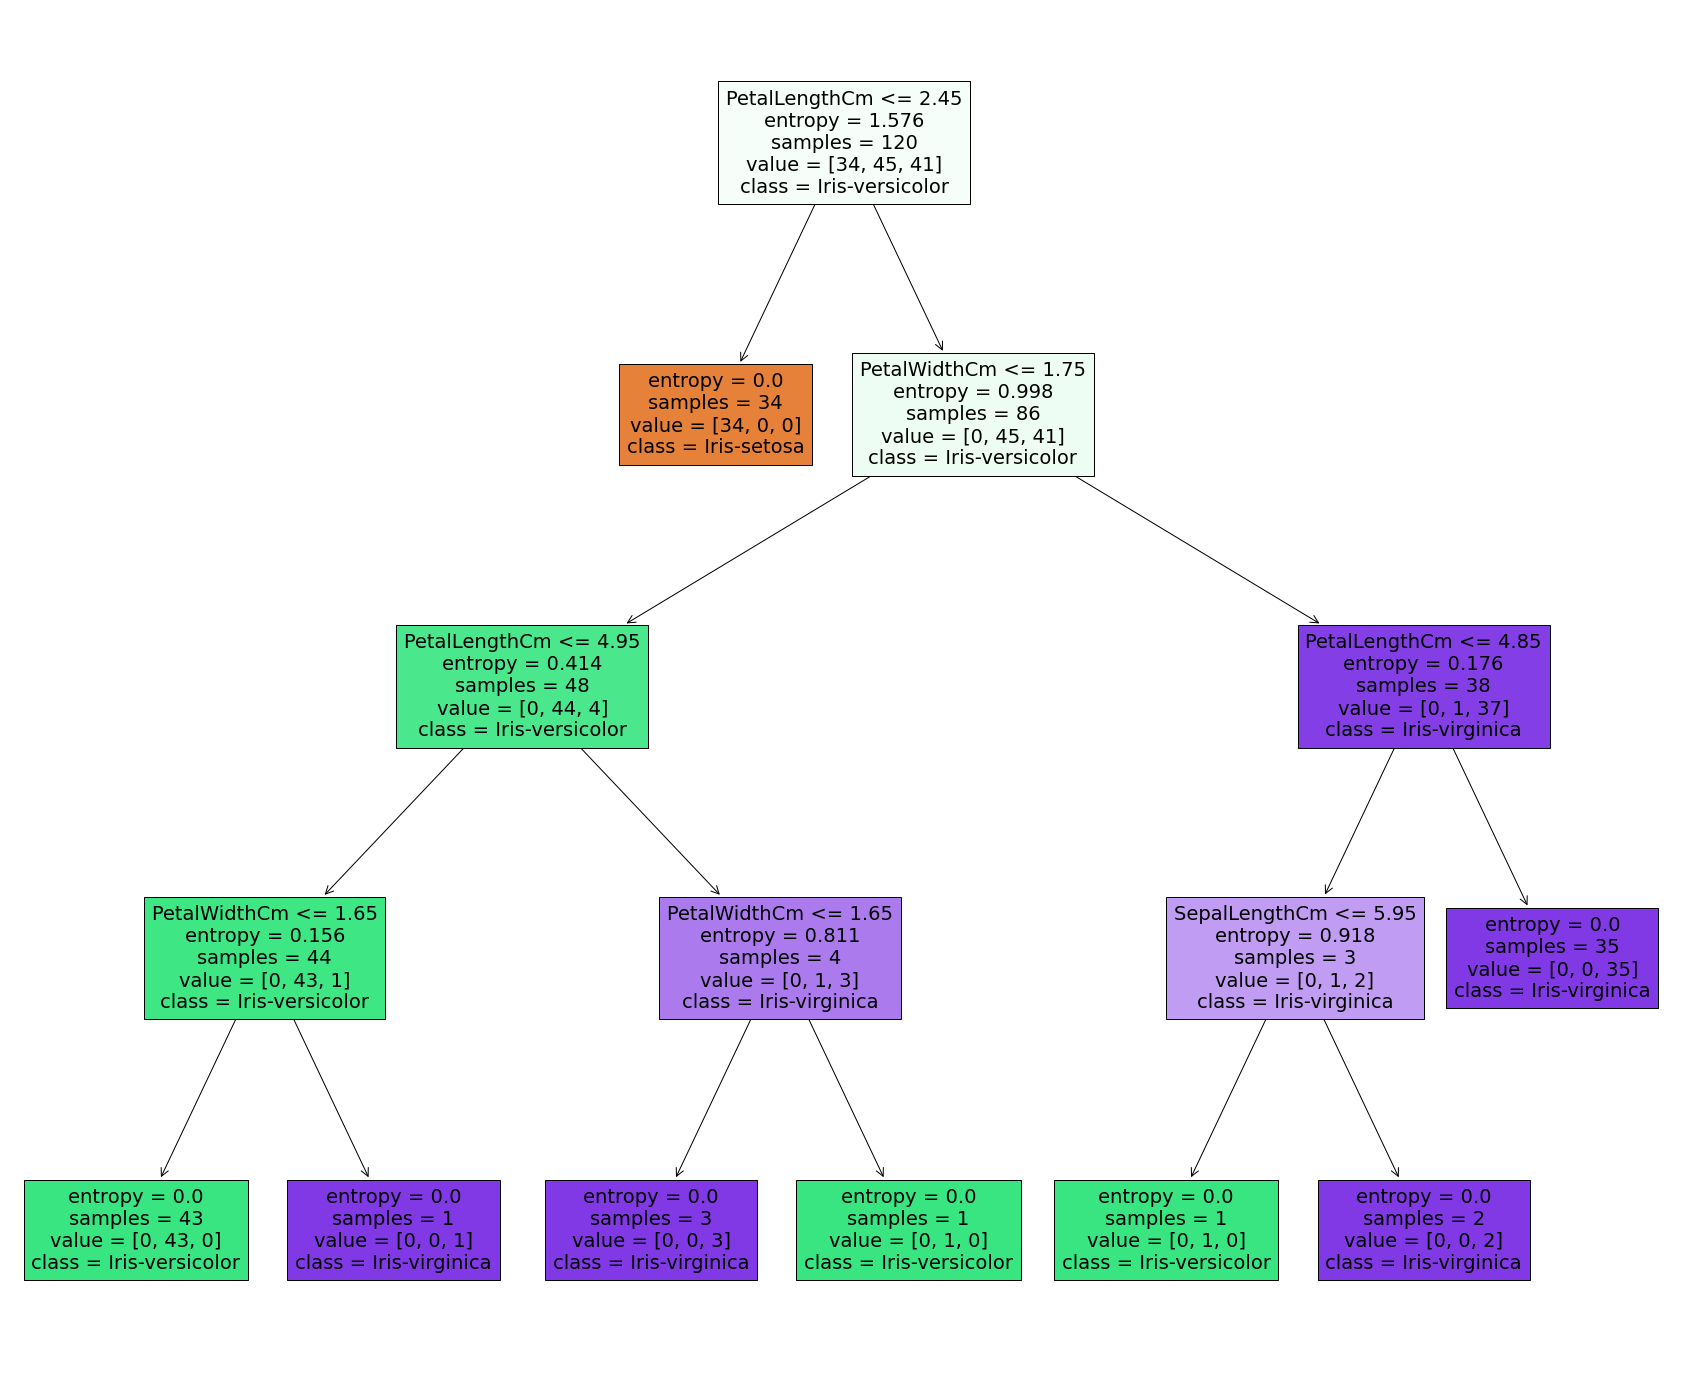

In [51]:
text_representation = tree.export_text(classifier)
fig = plt.figure(figsize=(30,25))
_ = tree.plot_tree(classifier, feature_names=dataset.columns.drop("Species"),class_names=dataset.Species.unique(), 
                   filled=True)